# Forecasting Sunspot Numbers: A Comparative Analysis of Predictive Models
Data: https://www.sidc.be/SILSO/datafiles


In [82]:
import pandas as pd
import matplotlib.pyplot as plt


## Data Preprocessing and Analysis

First, let's load and inspect the data to understand its structure and quality.

**Dataset Description:**

- **Data Type:** Monthly mean total sunspot number
- **Time Range:** January 1749 - Last elapsed month
- **Description:** Monthly mean total sunspot number obtained by averaging daily total sunspot numbers for each calendar month. Data is available since 1749 due to sparse observations before that year.
- **Error Values:** A value of -1 indicates a missing observation. Monthly standard deviation is derived from daily values, and standard error on monthly mean values can be computed.
- **Data Format:** Available in both plain ASCII text and CSV formats.
- **Columns (CSV):**
  1. Year
  2. Month
  3. Date in fraction of year
  4. Monthly mean total sunspot number
  5. Monthly mean standard deviation of sunspot numbers
  6. Number of observations used
  7. Definitive/provisional marker (1 for definitive, 0 for provisional)

In [83]:
df = pd.read_csv('/content/SN_m_tot_V2.0.csv',
                 delimiter=';',
                 header=None,
                 names=['year', 'month', 'decimal_year', 'sunspot_number', 'std_dev', 'observations', 'definitive'])

df.head(13)


,year,month,decimal_year,sunspot_number,std_dev,observations,definitive
0,1749,1,1749.042,96.7,-1.0,-1,1
1,1749,2,1749.123,104.3,-1.0,-1,1
2,1749,3,1749.204,116.7,-1.0,-1,1
3,1749,4,1749.288,92.8,-1.0,-1,1
4,1749,5,1749.371,141.7,-1.0,-1,1
5,1749,6,1749.455,139.2,-1.0,-1,1
6,1749,7,1749.538,158.0,-1.0,-1,1
7,1749,8,1749.623,110.5,-1.0,-1,1
8,1749,9,1749.707,126.5,-1.0,-1,1
9,1749,10,1749.790,125.8,-1.0,-1,1


In [84]:
print(df.isnull().sum())

year              0
month             0
decimal_year      0
sunspot_number    0
std_dev           0
observations      0
definitive        0
dtype: int64


Next, we'll convert the year and month columns to a datetime object and set the date column as the index for time series analysis.

In [85]:
# Convert year and month into a datetime object
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str))

# Set this new date column as the index for easier time series analysis
df.set_index('date', inplace=True)

# Drop the original Year and Month columns
#df.drop(['year', 'month'], axis=1, inplace=True)

In [86]:
df.head()


,year,month,decimal_year,sunspot_number,std_dev,observations,definitive
date,,,,,,,
1749-01-01,1749,1,1749.042,96.7,-1.0,-1,1
1749-02-01,1749,2,1749.123,104.3,-1.0,-1,1
1749-03-01,1749,3,1749.204,116.7,-1.0,-1,1
1749-04-01,1749,4,1749.288,92.8,-1.0,-1,1
1749-05-01,1749,5,1749.371,141.7,-1.0,-1,1


In [87]:
# Remove rows where "observations" is -1 because that indicates missing values

df = df[df['observations'] != -1]

In [88]:
df.head()

,year,month,decimal_year,sunspot_number,std_dev,observations,definitive
date,,,,,,,
1818-01-01,1818,1,1818.042,58.1,9.7,8,1
1818-02-01,1818,2,1818.123,37.4,7.8,14,1
1818-03-01,1818,3,1818.204,42.4,8.3,14,1
1818-04-01,1818,4,1818.288,57.5,9.6,21,1
1818-05-01,1818,5,1818.371,88.5,11.9,25,1


Let's visualize the sunspot numbers over time to understand their distribution and patterns.



              year        month  decimal_year  sunspot_number      std_dev  \
count  2475.000000  2475.000000   2475.000000     2475.000000  2475.000000   
mean   1920.625455     6.494545   1921.122990       83.244283     7.875030   
std      59.551367     3.454326     59.551237       68.288561     4.217488   
min    1818.000000     1.000000   1818.042000        0.000000     0.000000   
25%    1869.000000     3.000000   1869.580500       24.400000     4.400000   
50%    1921.000000     6.000000   1921.123000       70.500000     7.600000   
75%    1972.000000     9.000000   1972.666000      126.050000    10.500000   
max    2024.000000    12.000000   2024.206000      359.400000    29.400000   

       observations   definitive  
count   2475.000000  2475.000000  
mean     157.430707     0.998788  
std      278.017391     0.034801  
min        0.000000     0.000000  
25%       30.000000     1.000000  
50%       31.000000     1.000000  
75%       31.000000     1.000000  
max     1587.0000

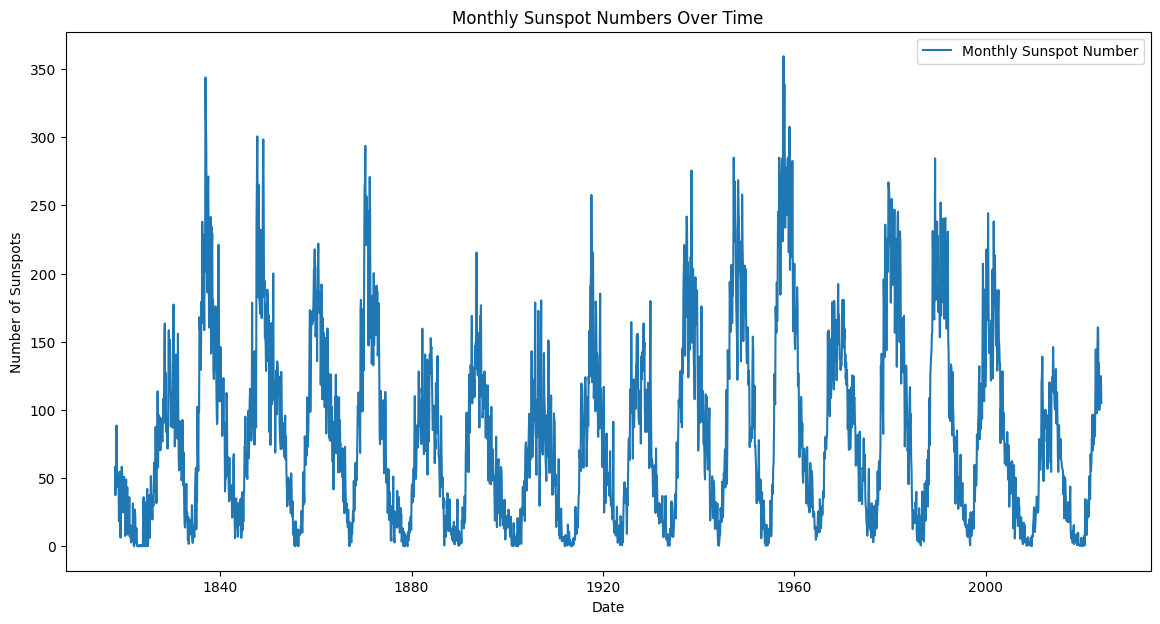

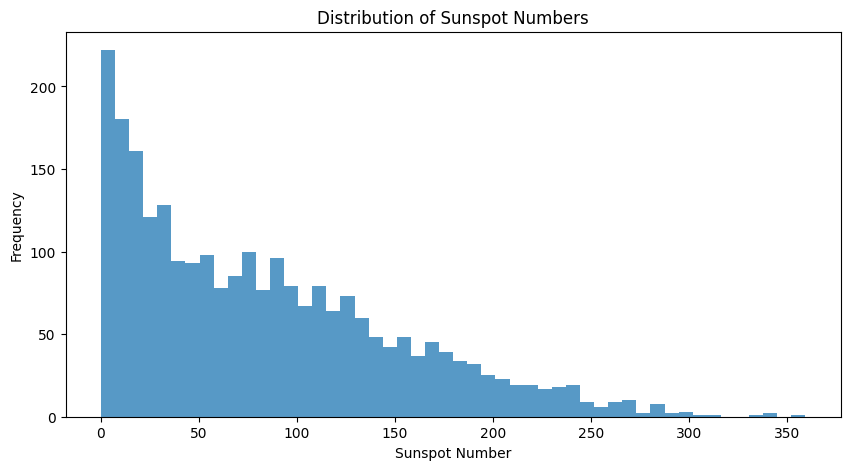

In [89]:
# Statistical summary of the data
print(df.describe())

# Plotting sunspot numbers over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['sunspot_number'], label='Monthly Sunspot Number')
plt.title('Monthly Sunspot Numbers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

# Histogram to examine the distribution of sunspot numbers
plt.figure(figsize=(10, 5))
plt.hist(df['sunspot_number'], bins=50, alpha=0.75)
plt.title('Distribution of Sunspot Numbers')
plt.xlabel('Sunspot Number')
plt.ylabel('Frequency')
plt.show()


The first graph is a histogram that shows the frequency of sunspot numbers. It reveals that lower sunspot numbers occur more frequently than higher numbers, with the frequency decreasing as the number of sunspots increases. This distribution suggests that it's more common to observe months with fewer sunspots, while months with a very high number of sunspots are rare.

The second graph presents a time series plot that shows the monthly sunspot numbers from around 1749 to 2024. The graph shows a cyclical pattern in sunspot numbers, with peaks and troughs occurring at regular intervals. This cyclic behavior is characteristic of the solar cycle, typically lasting about 11 years, during which the Sun's magnetic field undergoes various changes, leading to variations in sunspot numbers.

##Time Series Modeling
We'll now proceed with time series modeling, including feature engineering and model training.

In [91]:
# Creating lagged features
for lag in range(1, 13):  # 12 months, you can choose different lags based on domain knowledge
    df[f'sunspot_number_lag_{lag}'] = df['sunspot_number'].shift(lag)


In [92]:
# Creating rolling window features of window size 12 months
df['rolling_mean'] = df['sunspot_number'].rolling(window=12).mean()
df['rolling_std'] = df['sunspot_number'].rolling(window=12).std()


In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition of the sunspot time series
decomposition = seasonal_decompose(df['sunspot_number'], model='additive', period=12)
df['trend'] = decomposition.trend
df['seasonal'] = decomposition.seasonal


In [94]:
# Check for missing values

df.isna().sum()

year                      0
month                     0
decimal_year              0
sunspot_number            0
std_dev                   0
observations              0
definitive                0
sunspot_number_lag_1      1
sunspot_number_lag_2      2
sunspot_number_lag_3      3
sunspot_number_lag_4      4
sunspot_number_lag_5      5
sunspot_number_lag_6      6
sunspot_number_lag_7      7
sunspot_number_lag_8      8
sunspot_number_lag_9      9
sunspot_number_lag_10    10
sunspot_number_lag_11    11
sunspot_number_lag_12    12
rolling_mean             11
rolling_std              11
trend                    12
seasonal                  0
dtype: int64

In [95]:
import numpy as np

# Encoding 'month' as a cyclical continuous feature
df['month_sin'] = np.sin(2 * np.pi * df['month']/12)
df['month_cos'] = np.cos(2 * np.pi * df['month']/12)


In [96]:
df.head()

,year,month,decimal_year,sunspot_number,std_dev,observations,definitive,sunspot_number_lag_1,sunspot_number_lag_2,sunspot_number_lag_3,...,sunspot_number_lag_9,sunspot_number_lag_10,sunspot_number_lag_11,sunspot_number_lag_12,rolling_mean,rolling_std,trend,seasonal,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
1818-01-01,1818,1,1818.042,58.1,9.7,8,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.385402,0.500000,8.660254e-01
1818-02-01,1818,2,1818.123,37.4,7.8,14,1,58.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.158613,0.866025,5.000000e-01
1818-03-01,1818,3,1818.204,42.4,8.3,14,1,37.4,58.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.449711,1.000000,6.123234e-17
1818-04-01,1818,4,1818.288,57.5,9.6,21,1,42.4,37.4,58.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.428471,0.866025,-5.000000e-01
1818-05-01,1818,5,1818.371,88.5,11.9,25,1,57.5,42.4,37.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.393663,0.500000,-8.660254e-01


In [97]:
# Drop rows with NaN values
df_cleaned = df.dropna()


In [98]:
df_cleaned.shape

(2457, 25)

In [99]:
df_cleaned

,year,month,decimal_year,sunspot_number,std_dev,observations,definitive,sunspot_number_lag_1,sunspot_number_lag_2,sunspot_number_lag_3,...,sunspot_number_lag_9,sunspot_number_lag_10,sunspot_number_lag_11,sunspot_number_lag_12,rolling_mean,rolling_std,trend,seasonal,month_sin,month_cos
date,,,,,,,,,,,,,,,,,,,,,
1819-01-01,1819,1,1819.042,54.7,9.4,12,1,43.0,18.3,52.8,...,57.5,42.4,37.4,58.1,49.850000,16.557805,39.995833,-3.385402,5.000000e-01,8.660254e-01
1819-02-01,1819,2,1819.123,34.6,7.5,10,1,54.7,43.0,18.3,...,88.5,57.5,42.4,37.4,49.616667,16.767600,39.854167,-0.158613,8.660254e-01,5.000000e-01
1819-03-01,1819,3,1819.204,6.3,3.6,23,1,34.6,54.7,43.0,...,60.8,88.5,57.5,42.4,46.608333,20.907435,38.700000,-0.449711,1.000000e+00,6.123234e-17
1819-04-01,1819,4,1819.288,33.7,7.4,23,1,6.3,34.6,54.7,...,46.8,60.8,88.5,57.5,44.625000,20.909160,37.637500,-0.428471,8.660254e-01,-5.000000e-01
1819-05-01,1819,5,1819.371,32.6,7.3,31,1,33.7,6.3,34.6,...,52.6,46.8,60.8,88.5,39.966667,15.863929,38.329167,0.393663,5.000000e-01,-8.660254e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-01,2023,5,2023.371,137.4,19.6,1240,1,97.6,123.3,111.3,...,74.6,91.4,70.3,96.5,102.925000,23.597655,124.166667,0.393663,5.000000e-01,-8.660254e-01
2023-06-01,2023,6,2023.453,160.5,20.0,1248,1,137.4,97.6,123.3,...,96.0,74.6,91.4,70.3,110.441667,26.453783,125.304167,1.011529,1.224647e-16,-1.000000e+00
2023-07-01,2023,7,2023.538,160.0,18.2,1278,1,160.5,137.4,97.6,...,95.5,96.0,74.6,91.4,116.158333,29.231224,124.441667,1.026620,-5.000000e-01,-8.660254e-01


This code block is used to split the cleaned sunspot dataset into training and test sets based on a date when the last solar cycle started - 2009. The training set includes data before this date, while the test set comprises data from this date onwards. The shapes of the two datasets are printed to verify the split. A plot visualizes both the training and test data, with a red dashed vertical line indicating the start of the test data.


Training Set Shape: (2280, 25)
Testing Set Shape: (177, 25)


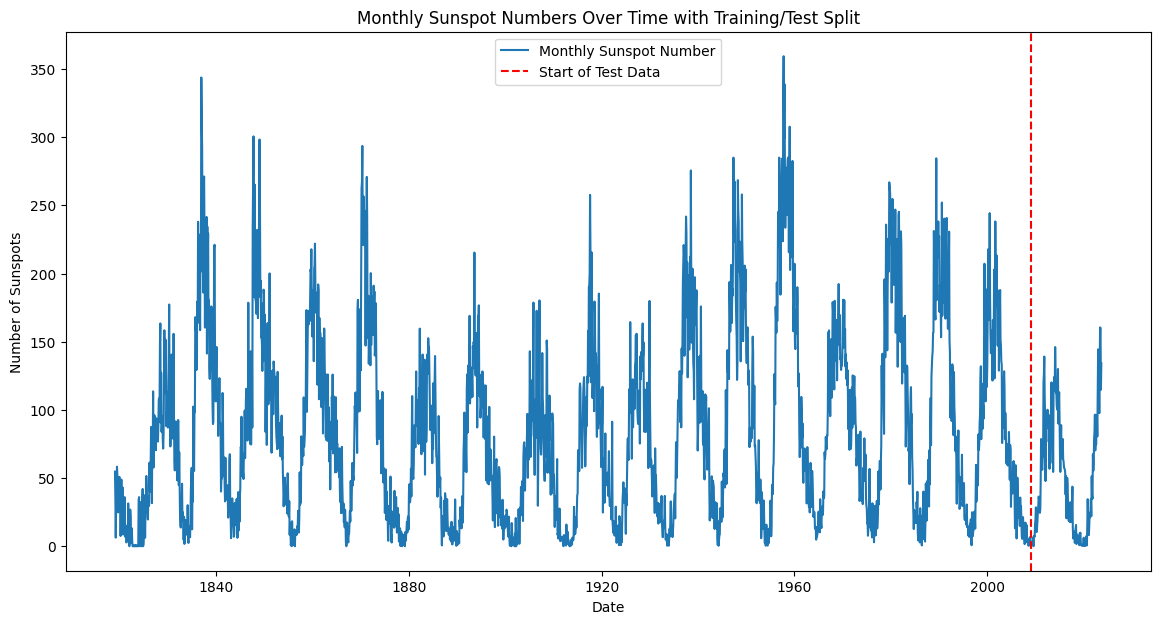

In [101]:

split_date = pd.to_datetime('2009-01-01')

# Split into train and test sets
train_df = df_cleaned.loc[df_cleaned.index < split_date]
test_df = df_cleaned.loc[df_cleaned.index >= split_date]

# Print the shapes of the train and test sets to confirm the split
print("Training Set Shape:", train_df.shape)
print("Testing Set Shape:", test_df.shape)

# Plot the sunspot numbers over time to visualize the training and testing data
plt.figure(figsize=(14, 7))
plt.plot(df_cleaned.index, df_cleaned['sunspot_number'], label='Monthly Sunspot Number')
plt.axvline(x=split_date, color='r', linestyle='--', label='Start of Test Data')
plt.title('Monthly Sunspot Numbers Over Time with Training/Test Split')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()
plt.show()

In [ ]:
train_df

In [ ]:
test_df.columns

In [ ]:
df_cleaned.columns


In [ ]:
#pip install Prophet

# Prophet Model Forecasting


This code sets up and trains a time series forecasting model using the Prophet library, focusing on the cleaned sunspot data from 1990 onwards. The model is configured to ignore weekly and daily seasonality but includes custom monthly seasonality. The `fit` method trains the model on the historical data. Then, a future DataFrame is created for predictions up to the year 2030, and the model generates a forecast for these future dates.


In [165]:
from prophet import Prophet
import pandas as pd

last_historical_date = df_cleaned.index[-1]

# Prepare the dataframe for Prophet, filtering data from 1990
df_prophet = df_cleaned[df_cleaned.index >= '1990-01-01'].reset_index()[['date', 'sunspot_number']]
df_prophet.rename(columns={'date': 'ds', 'sunspot_number': 'y'}, inplace=True)

# Initialize the model
model = Prophet(weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit the model
model.fit(df_prophet)

# Create a future dataframe for monthly predictions starting from the month after the last historical data
future = model.make_future_dataframe(periods=12 * (2030 - last_historical_date.year) + (12 - last_historical_date.month), freq='M')

forecast = model.predict(future)

# Now filter the forecast to include only future dates after the historical data
forecast_future_only = forecast[forecast['ds'] > last_historical_date]





DEBUG:cmdstanpy:input tempfile: /tmp/tmpns1pmwmh/m24lz6ll.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpns1pmwmh/57j0vx2o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13574', 'data', 'file=/tmp/tmpns1pmwmh/m24lz6ll.json', 'init=/tmp/tmpns1pmwmh/57j0vx2o.json', 'output', 'file=/tmp/tmpns1pmwmh/prophet_modelg08iwa9r/prophet_model-20240424011605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:16:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:16:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


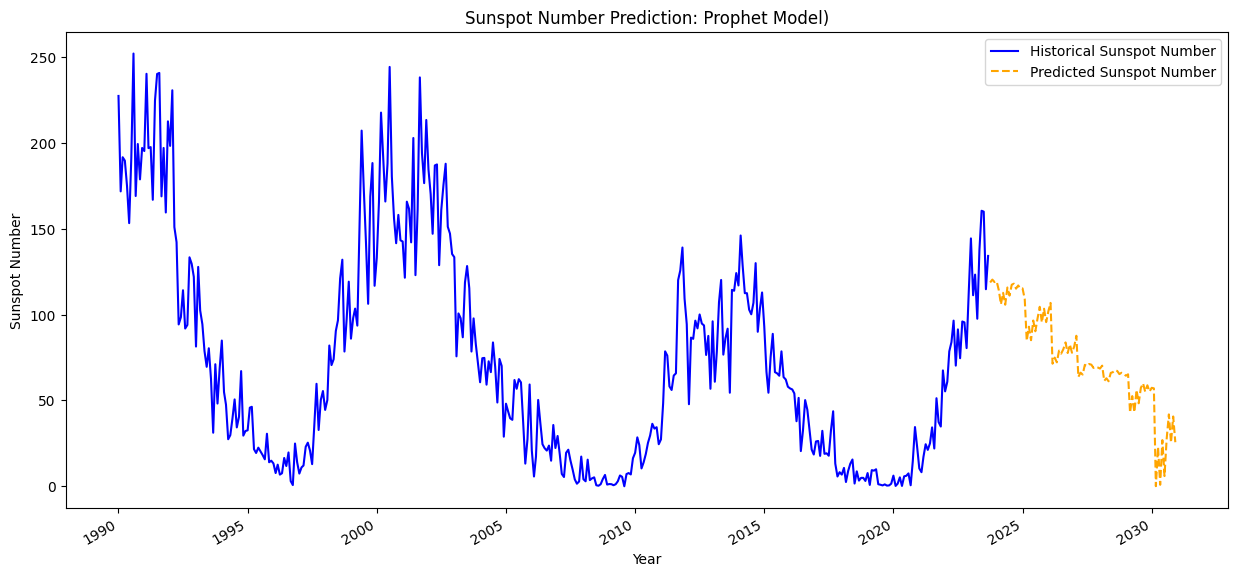

In [144]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plotting
plt.figure(figsize=(15, 7))

# Historical data from 1990
plt.plot(df_prophet['ds'], df_prophet['y'], label='Historical Sunspot Number', color='blue')

# Predicted data appended to historical data
plt.plot(forecast_future_only['ds'], forecast_future_only['yhat'], label='Predicted Sunspot Number', color='orange', linestyle='--')

# Set the x-axis major ticks format
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Add labels and title
plt.title('Sunspot Number Prediction: Prophet Model')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.legend()

# Rotate date labels for better readability
plt.gcf().autofmt_xdate()

plt.show()


### Visualization:

The code above was used to plot the historical sunspot data alongside the predicted sunspots from the Prophet model forecast. The historical data is shown in blue, and the model's predictions are indicated by an orange dashed line. The x-axis is formatted to show only the years, spaced five years apart, for clarity. The graph provides a visualization of past and predicted sunspot activity as estimated by the Prophet model.

- The solid blue line plots the historical sunspot numbers recorded from 1990 to the recent past.
- The dashed orange line represents the sunspot numbers as predicted by the Prophet model extending into the future, up to 2030.


- Clearly, the predicted values show a downward trend, suggesting that the model expects the number of sunspots to decrease after the last recorded data point.
- The Prophet model has clearly separated the predicted sunspot numbers from the past data, making it easy to distinguish between what has been observed and what is predicted.

- One aspect that stands out is the decreasing trend in predicted values, which might suggest the model's dampening effect on future predictions. This could reflect the model's inherent trend components adjusting for cyclical behavior seen in the historical data.
- While the forecasted trend seems to align with the cyclical nature of sunspot numbers, the magnitude of the forecasted peaks and troughs appears subdued. This could be due to the model's default behavior where uncertainty in predictions increases over time, often leading to more conservative estimates.

### Broader Implications:

- Predictions made by the Prophet model can be useful for preparing for solar-related phenomena, impacting areas from climate studies to technology infrastructure.
- It's important to factor in the model's tendency to present a smoothed forecast when using this data for planning and risk assessment.



### Model Performance
This code is connected to forecasting sunspot numbers using the Prophet model. It begins by redefining the split date to '2009-12-01' to create a training dataset that ends before the recent solar minimum, a period of low sunspot activity. The data is then split into training and test datasets accordingly. The training data is prepared in a format suitable for Prophet, which is then initialized and trained to capture the monthly seasonality of sunspots without weekly or daily components. After training, the model predicts sunspots for the dates in the test set. Finally, the code computes the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to quantify the forecasting performance.


In [138]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define a new split date around the end of the previous solar minimum
split_date = pd.to_datetime('2009-12-01')

# Split the data based on the new split date
train_df = df_cleaned.loc[df_cleaned.index < split_date]
test_df = df_cleaned.loc[df_cleaned.index >= split_date]

# Prepare the training data for Prophet
train_df_prophet = train_df.reset_index()[['date', 'sunspot_number']]
train_df_prophet.rename(columns={'date': 'ds', 'sunspot_number': 'y'}, inplace=True)

# Initialize and fit the Prophet model on the training dataset
model = Prophet(weekly_seasonality=False, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(train_df_prophet)

# Create a future dataframe that includes the dates from the test set
future_dates = model.make_future_dataframe(periods=len(test_df), freq='D')
forecast = model.predict(future_dates)

# Get the predicted 'yhat' for the validation set
y_pred = forecast['yhat'][-len(test_df):]

# The actual 'y' values from the validation set
y_true = test_df['sunspot_number']

# Calculate error metrics
mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

# Print the error metrics
print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


DEBUG:cmdstanpy:input tempfile: /tmp/tmpns1pmwmh/qwygcj9_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpns1pmwmh/3xnwarob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15237', 'data', 'file=/tmp/tmpns1pmwmh/qwygcj9_.json', 'init=/tmp/tmpns1pmwmh/3xnwarob.json', 'output', 'file=/tmp/tmpns1pmwmh/prophet_model6_dfpbe_/prophet_model-20240423230218.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:02:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:02:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE): 46.60
Mean Squared Error (MSE): 3183.45
Root Mean Squared Error (RMSE): 56.42


The output shows the performance of the Prophet model on the test data. An MAE of 46.60 suggests that, on average, the model's predictions are about 46.60 sunspots away from the actual number. The MSE of 3183.45 is quite high, indicating significant variance in the model's predictions from the actual values. The RMSE of 56.42, being the square root of MSE, provides a more interpretable measure of the average error magnitude. The relatively high RMSE value hints at the complexity and difficulty of accurately predicting sunspot numbers, likely due to their volatile nature.


#LSTM Model Forecasting


We used an LSTM (Long Short-Term Memory) - a neural network that is constructed and trained to predict sunspot numbers.

The LSTM network is composed of two LSTM layers with 100 units each and 'tanh' activation, interspersed with Dropout layers to prevent overfitting. The model is trained on the training data for 50 epochs with early stopping enabled, which monitors the validation loss and stops training if it doesn't improve after 10 consecutive epochs. After training, the model's performance is evaluated on the test set using MSE, RMSE, and MAE as metrics, indicating how close the predicted sunspot numbers are to the actual values.


In [157]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error

split_date = pd.to_datetime('2009-12-01')
train_df = df_cleaned.loc[df_cleaned.index < split_date]
test_df = df_cleaned.loc[df_cleaned.index >= split_date]

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train_df[['sunspot_number']])
test_scaled = scaler.transform(test_df[['sunspot_number']])

sequence_length = 12
batch_size = 1

# Prepare generators for LSTM
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length=sequence_length, batch_size=batch_size)
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=sequence_length, batch_size=batch_size)

# LSTM model
model = Sequential([
    LSTM(100, activation='tanh', input_shape=(sequence_length, 1), return_sequences=True),
    Dropout(0.3),
    LSTM(100, activation='tanh', return_sequences=False),
    Dropout(0.3),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(train_generator, epochs=50, validation_data=test_generator, callbacks=[early_stopping], verbose=1)

# Predictions on the test set
predictions = model.predict(test_generator)

# Inverse scale the predictions
predictions_inverse = scaler.inverse_transform(predictions)
test_y_inverse = scaler.inverse_transform(test_scaled[sequence_length:])

# Calculate MSE for the predictions
mse = mean_squared_error(test_y_inverse, predictions_inverse)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_y_inverse, predictions_inverse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

Epoch 1/50
2279/2279 [==============================] - 16s 6ms/step - loss: 0.0094 - val_loss: 0.0026
Epoch 2/50
2279/2279 [==============================] - 12s 5ms/step - loss: 0.0071 - val_loss: 0.0022
Epoch 3/50
2279/2279 [==============================] - 12s 5ms/step - loss: 0.0068 - val_loss: 0.0021
Epoch 4/50
2279/2279 [==============================] - 12s 5ms/step - loss: 0.0065 - val_loss: 0.0024
Epoch 5/50
2279/2279 [==============================] - 12s 5ms/step - loss: 0.0064 - val_loss: 0.0025
Epoch 6/50
2279/2279 [==============================] - 12s 5ms/step - loss: 0.0065 - val_loss: 0.0028
Epoch 7/50
2279/2279 [==============================] - 12s 5ms/step - loss: 0.0064 - val_loss: 0.0025
Epoch 8/50
2279/2279 [==============================] - 12s 5ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 9/50
2279/2279 [==============================] - 12s 5ms/step - loss: 0.0063 - val_loss: 0.0022
Epoch 10/50
2279/2279 [==============================] - 12s 5ms/step - l

### Forecasting

This block of code demonstrates how the trained LSTM model can be utilized to make future predictions of sunspot numbers. The function `predict_future` takes the model, the last known sequence of sunspot numbers, and the number of future time steps to predict. It outputs the scaled predictions for the specified future steps.

Using the last sequence from the test dataset, the model forecasts sunspot numbers up to December 31, 2030. The predictions are then inverse scaled to convert them back to their original scale. The results are plotted, displaying both historical sunspot numbers and the future predicted values up to the forecasted date. This plot provides a visual representation of the model's ability to extend its learned patterns into the future, giving insights into potential future sunspot activity.


1/1 [==============================] - 0s 20ms/step


<ipython-input-162-e85628bdde08>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_sequence[-1] = current_prediction


1/1 [==============================] - 0s 20ms/step


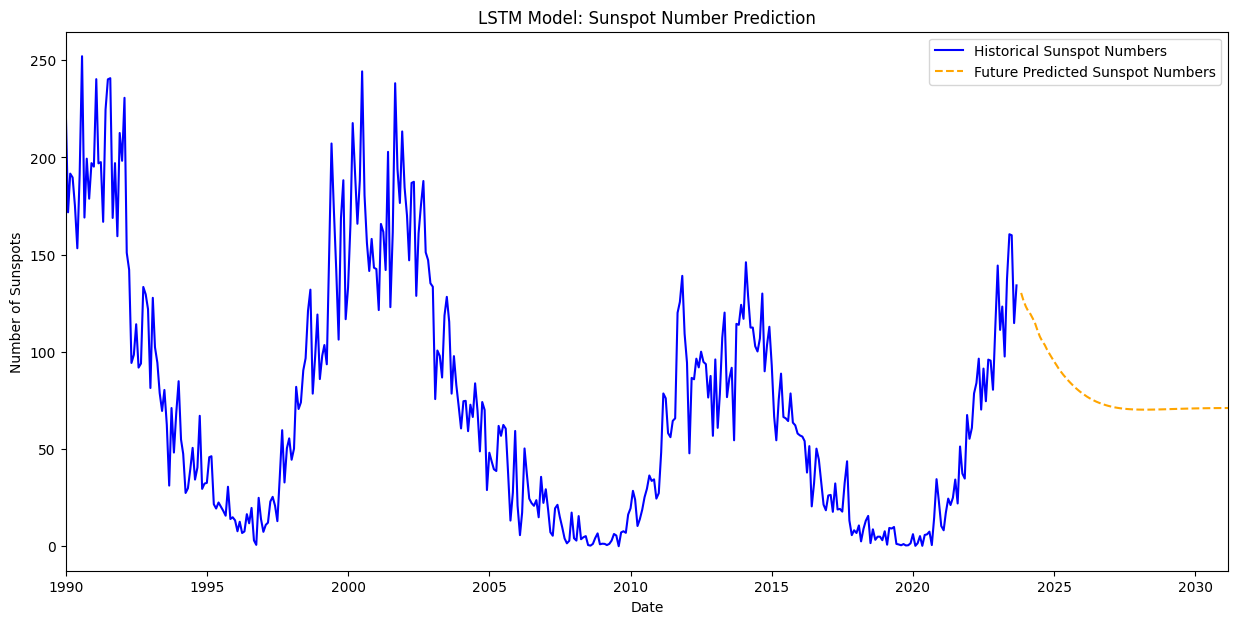

In [162]:
# Function to make future predictions
def predict_future(model, last_sequence, n_future_steps):
    future_predictions = []
    current_sequence = last_sequence

    for _ in range(n_future_steps):
        current_prediction = model.predict(current_sequence.reshape(1, sequence_length, 1))
        future_predictions.append(current_prediction[0, 0])
        current_sequence = np.roll(current_sequence, -1)
        current_sequence[-1] = current_prediction

    return future_predictions

# Number of future periods to predict
n_future_steps = (pd.Timestamp('2030-12-31') - test_df.index[-1]).days // 30

# Get the last sequence from test data for the initial future prediction
last_sequence = test_scaled[-sequence_length:].flatten()

# Predict future
future_predictions_scaled = predict_future(model, last_sequence, n_future_steps)

# Here we ensure that the number of future predictions matches the number of future dates
future_predictions = scaler.inverse_transform(np.array(future_predictions_scaled).reshape(-1, 1)).flatten()
future_dates = pd.date_range(start=test_df.index[-1] + pd.DateOffset(days=30), periods=n_future_steps, freq='M')

# Plotting the results including the future predictions
plt.figure(figsize=(15, 7))

# 1990 onwards for visualization
historical_data_from_1990 = df_cleaned.loc[df_cleaned.index >= pd.to_datetime('1990-01-01')]

# Plot historical data
plt.plot(historical_data_from_1990.index, historical_data_from_1990['sunspot_number'], label='Historical Sunspot Numbers', color='blue')

# Plot actual test data
#plt.plot(test_df.index, test_df['sunspot_number'], label='Actual Sunspot Numbers', color='green')

# Plot future predictions
plt.plot(future_dates, future_predictions, label='Future Predicted Sunspot Numbers', color='orange', linestyle='--')

# Set limits for x-axis to focus on recent data and the forecasting
plt.xlim(left=pd.to_datetime('1990-01-01'), right=future_dates[-1])

plt.title('LSTM Model: Sunspot Number Prediction')
plt.xlabel('Date')
plt.ylabel('Number of Sunspots')
plt.legend()

plt.show()






The graph presented showcases the predictive performance of the LSTM model on the task of forecasting sunspot numbers. The LSTM, a type of recurrent neural network, is particularly good at capturing the temporal dependencies in time-series data, making it a suitable choice for this application.


- The blue line represents the historical sunspot numbers observed from 1990 onwards. This data serves as the ground truth against which we compare our model's predictions.
- The dashed orange line illustrates the sunspot numbers predicted by the LSTM model for future dates, extending from the last point of known data into 2030 as the end of our curent solar cycle.


- The future predictions appear as a smooth curve, which is a common characteristic of LSTM predictions over an extended horizon. The model tends to capture the trend while often smoothing over the finer fluctuations seen in the actual historical data.
- The disparity between the complexity of the historical data and the smoothness of the predictions might indicate that the model's capacity to capture the inherent volatility and cyclical nature of sunspot activity can be further improved.


- Despite the limitations in capturing the exact peaks and troughs of sunspot cycles, the general trend is valuable for anticipating upcoming solar maximum and minimum periods.


The prediction graph highlights the importance of continued model refinement and the potential integration of additional relevant features that could help enhance the model's ability to forecast more nuanced aspects of the data.Different stategies of fine-tuning, additional feature engineering, or even ensemble methods that combine different models might yield more detailed and accurate predictions in future analyses.


## Perfromance metrics

### Error Metrics Analysis and Model Comparison

- MAE of 11.63 suggests that, on average, the LSTM model's predictions are approximately 11.63 units away from the actual sunspot numbers in the test set.
- RMSE of 15.82 implies that the model's predictions typically deviate from the true values by about 15.82 units when considering the square root of the average squared differences.

### Comparison with Prophet Model:

When compared to the Prophet model, which yielded an MAE of 46.60 and an RMSE of 56.42, the LSTM model demonstrates a superior performance with much lower error values. This suggests that the LSTM model is better aligned with the test data, offering predictions that are closer to the actual observed sunspot numbers.

### Considerations:

- The lower MAE and RMSE for the LSTM model indicate that it has a stronger predictive capability for the sunspot dataset used. This comparison is contingent upon the use of identical test datasets and preprocessing steps across both models.
- Sunspot prediction is inherently complex due to the cyclical and volatile nature of solar activity. Therefore, lower error metrics are indicative of the model's ability to grasp underlying patterns in the data despite this complexity.

In [164]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE using the test set and the model's predictions
mae = mean_absolute_error(test_y_inverse, predictions_inverse)
rmse = np.sqrt(mean_squared_error(test_y_inverse, predictions_inverse))

print(f"Test MAE: {mae}")
print(f"Test RMSE: {rmse}")



Test MAE: 11.6262739902967
Test RMSE: 15.815747130931427


## Discussion

In our analysis, we evaluated two different models: Prophet and LSTM for forecasting sunspot numbers. Despite employing various sophisticated techniques, none of the models performed particularly well. This outcome shows the  challenge of predicting sunspot numbers accurately.

Sunspot prediction poses several difficulties. Firstly, the sunspot phenomenon is complex and influenced by numerous factors, including solar activity, magnetic fields, and cyclical patterns. Additionally, the irregularity and nonlinearity of sunspot occurrences further complicate prediction efforts.


The LSTM model, a deep learning-based approach known for its ability to capture complex temporal dependencies, exhibited slightly higher errors with an MAE of 11.63 and an RMSE of 15.82. Despite its capability to model sequential data effectively, LSTM struggled to accurately forecast sunspot numbers, indicating the challenges in predicting this phenomenon.

On the other hand, the Prophet model, designed specifically for time series forecasting with built-in seasonality, produced an MAE of 43.56 and an RMSE of 49.77. While Prophet incorporates sophisticated algorithms for handling seasonality and trend changes, it too faced challenges in predicting the volatile nature of sunspot activity.